# Data Analysis

This notebook analyzes outbound air travel by U.S. citizens from 1996-2017.

This notebook is mostly focused on making appropriate data visualizations.  Please see the data cleaning notebook for more information on the final construction of csv files used here.

### Importing Dependencies

It is best to simply load the libraries we will need here.

In [39]:
#import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

### Change in Travel Numbers Over Time

First, we'll take a look at the outbound travel by U.S. citizens by region of destination and year of travel.

In [40]:
#import year data in a dataframe
year_path = os.path.join('..', 'airline data', 'airline_totaled_yearly.csv')
years_df = pd.read_csv(year_path)

In [41]:
#take a look at dataframe
years_df.head()

Year    Europe  Caribbean     Asia  South America  Central America  \
0  1996   8946300    4020600  3155100        1455500          1045600   
1  1997  10099400    4108100  3399500        1681500          1094300   
2  1998  10995500    4170500  3459600        1824300          1323800   
3  1999  11665800    4533500  3635600        1812800          1495000   
4  2000  12774176    4585966  3859533        1806876          1524305   

   Oceania  Middle East  Africa   Mexico   Canada  
0   591800       433800  137600  3992400  3047200  
1   611500       449800  178000  4343300  3192400  
2   667600       432200  196200  4442600  3622800  
3   814600       445100  205000  4788600  3806700  
4   831619       447328  222480  4754169  3871893

In [42]:
#check data types
years_df.dtypes

Year               int64
Europe             int64
Caribbean          int64
Asia               int64
South America      int64
Central America    int64
Oceania            int64
Middle East        int64
Africa             int64
Mexico             int64
Canada             int64
dtype: object

It will be useful to get a color scheme for the regions.  We will use one of the Python color pallettes.

In [43]:
#get a color pallette to automatically select colors
color_pallette = plt.get_cmap('Paired')

We can now plot this data by year, with a different color for each region.

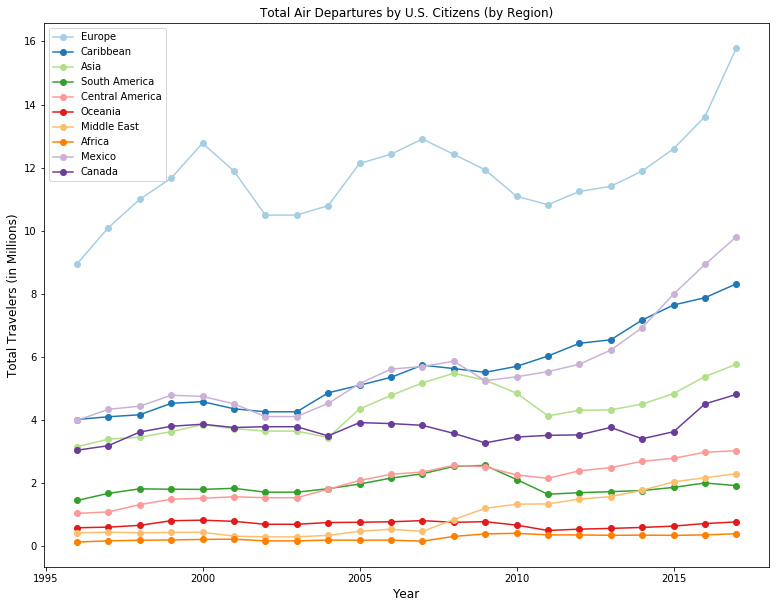

In [44]:
#plot yearly totals by region
plt.figure(figsize = (13, 10))

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    plt.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#plot a legend
plt.legend(loc = 'best')

#plot title and axis labels
plt.title('Total Air Departures by U.S. Citizens (by Region)', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Travelers (in Millions)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', 'yearly_total_regions_all.png')
plt.savefig(output_path)

#show figure
plt.show()

While this is a complete set of data, we can have trouble visualizing trends, so we will split it into two charts, with first the more traveled regions, and then the smaller traveled regions (the lowest five).  We will do a bit of code to make sure we get the same colors.

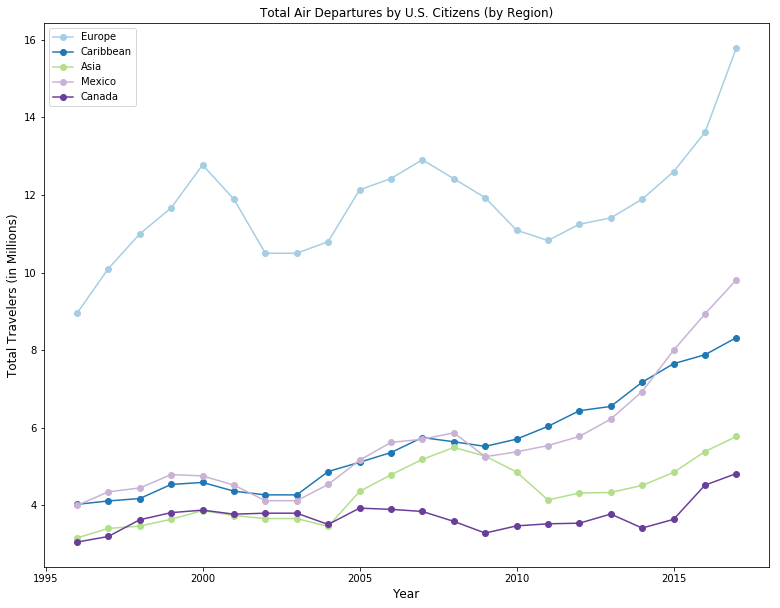

In [45]:
small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#plot yearly totals by region
plt.figure(figsize = (13, 10))

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column not in small_amounts:
        plt.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#plot a legend
plt.legend(loc = 'best')

#plot title and axis labels
plt.title('Total Air Departures by U.S. Citizens (by Region)', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Travelers (in Millions)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', 'yearly_total_regions_large.png')
plt.savefig(output_path)

#show figure
plt.show()

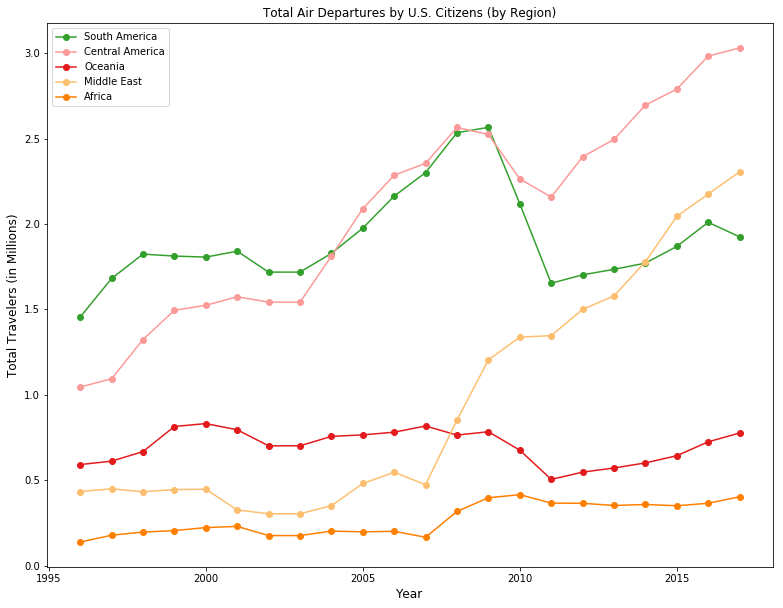

In [46]:
#do this again, but for lesser traveled regions (note we do a bit more steps to make the same colors)
small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#plot yearly totals by region
plt.figure(figsize = (13, 10))

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    #plot if in list
    if column in small_amounts:
        plt.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#plot a legend
plt.legend(loc = 'best')

#plot title and axis labels
plt.title('Total Air Departures by U.S. Citizens (by Region)', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Travelers (in Millions)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', 'yearly_total_regions_small.png')
plt.savefig(output_path)

#show figure
plt.show()

Clearly, we see a general increase, though not necessarily equal across all regions.  We can visualize this.

First, let us construct a data frame that looks at the totals for each year.

In [47]:
totals = years_df.iloc[:, 1:].sum(axis = 1).tolist()
total_df = pd.DataFrame({'Year': years_df['Year'], 'Total': totals})
total_df.head()

Year     Total
0  1996  26825900
1  1997  29157800
2  1998  31135100
3  1999  33202700
4  2000  34678345

Now, we can plot this.

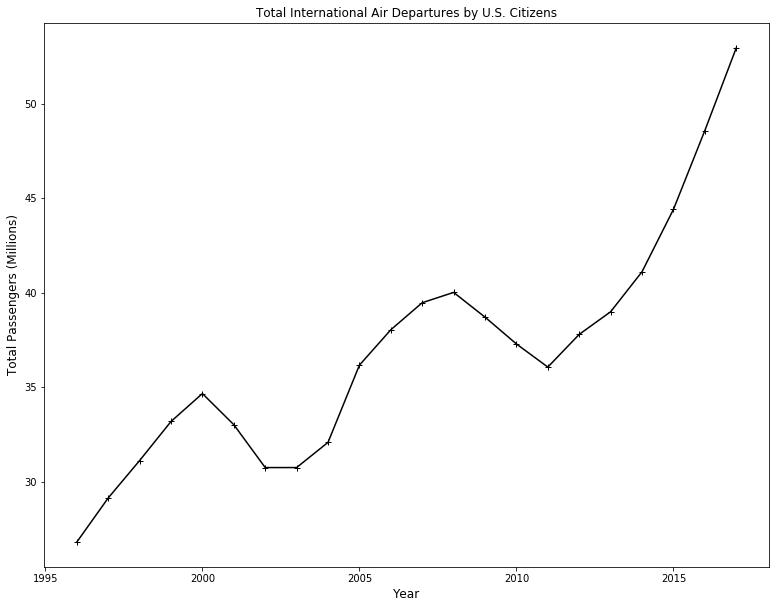

In [48]:
#do plot
fig = plt.figure(figsize = (13, 10))
plt.plot(total_df['Year'], total_df['Total']/1000000, '+-k')

#add labels
plt.title('Total International Air Departures by U.S. Citizens', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Passengers (Millions)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', 'yearly_totals.png')
plt.savefig(output_path)

#show
plt.show()

As we can see, we see a large increase over a more than two-decade span.  We do see dips however.

However, as we noted earlier, this change is probably not even across regions.

First, let's note the total change.

In [49]:
#calculate total percent change
total_change = 100*(years_df.iloc[-1, 1:].sum() - years_df.iloc[0, 1:].sum())/years_df.iloc[0, 1:].sum()
print(f'There was a {round(total_change, 2)}% increase of U.S. citizen departures between 1996 and 2017.')

There was a 97.4% increase of U.S. citizen departures between 1996 and 2017.


Now, let's note the change by region.

In [50]:
#calculate changes
changes = 100*(years_df.iloc[-1, 1:] - years_df.iloc[0, 1:])/years_df.iloc[0, 1:]

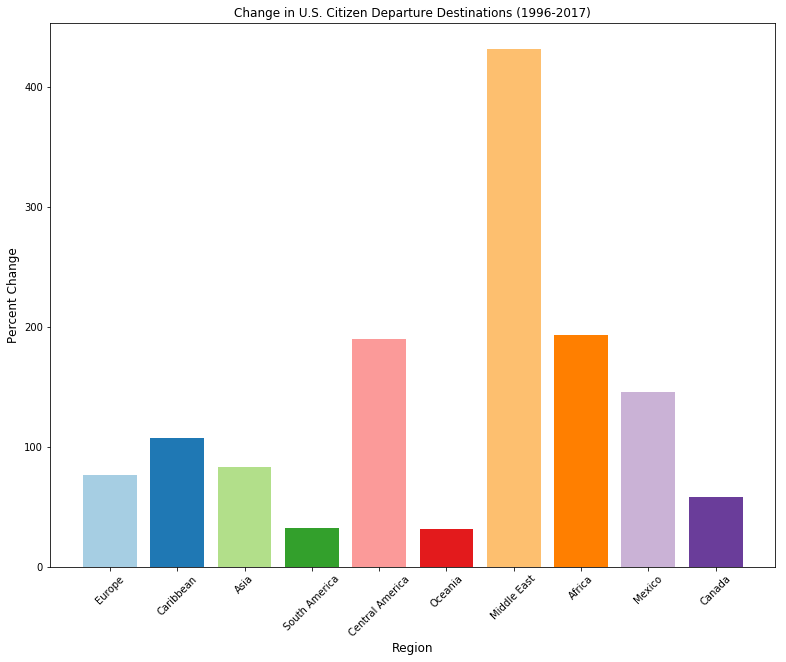

In [51]:
#get an x-axis for the plot
x_axis = np.arange(0, len(changes))

#get colors
colors = [color_pallette(i) for i in range(0, len(changes))]

#plot figure
fig = plt.figure(figsize = (13, 10))
plt.bar(x_axis, changes, color = colors)

#add labels
plt.xticks(x_axis, years_df.columns[1:], rotation = 45)

#add axis lables and titles
plt.title('Change in U.S. Citizen Departure Destinations (1996-2017)', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Percent Change', fontsize = 12)

#save figure
path = os.path.join('..', 'images', 'percent_change_region.png')
plt.savefig(path)

#show plot
plt.show()

We find that the largest percent change is from the Middle East, followed by Africa and Central America.  Meanwhile, travel to South America and Oceania see the smallest relative increases.  Interestingly, we see all five of these are the least traveled regions.  Meanwhile, of larger travel destinations, Mexico has the largest percent increase as a destination by air travel.

One final point of interest is percent change by year.  We can try plotting that as well.

In [60]:
#begin percent change data frame
percent_changes = years_df.copy()
for column in list(percent_changes.columns)[1:]:
    percent_changes[column+' PC'] = percent_changes[column].pct_change()
    
percent_changes.head()

Year    Europe  Caribbean     Asia  South America  Central America  \
0  1996   8946300    4020600  3155100        1455500          1045600   
1  1997  10099400    4108100  3399500        1681500          1094300   
2  1998  10995500    4170500  3459600        1824300          1323800   
3  1999  11665800    4533500  3635600        1812800          1495000   
4  2000  12774176    4585966  3859533        1806876          1524305   

   Oceania  Middle East  Africa   Mexico    ...      Europe PC  Caribbean PC  \
0   591800       433800  137600  3992400    ...            NaN           NaN   
1   611500       449800  178000  4343300    ...       0.128891      0.021763   
2   667600       432200  196200  4442600    ...       0.088728      0.015190   
3   814600       445100  205000  4788600    ...       0.060961      0.087040   
4   831619       447328  222480  4754169    ...       0.095011      0.011573   

    Asia PC  South America PC  Central America PC  Oceania PC  Middle East PC  \
0       NaN               NaN                 NaN         NaN             NaN   
1  0.077462          0.155273            0.046576    0.033288        0.036883   
2  0.017679          0.084924            0.209723    0.091742       -0.039129   
3  0.050873         -0.006304            0.129325    0.220192        0.029847   
4  0.061595         -0.003268            0.019602    0.020892        0.005006   

   Africa PC  Mexico PC  Canada PC  
0        NaN        NaN        NaN  
1   0.293605   0.087892   0.047650  
2   0.102247   0.022863   0.134820  
3   0.044852   0.077882   0.050762  
4   0.085268  -0.007190   0.017126  

[5 rows x 21 columns]

Now, we can graph this.

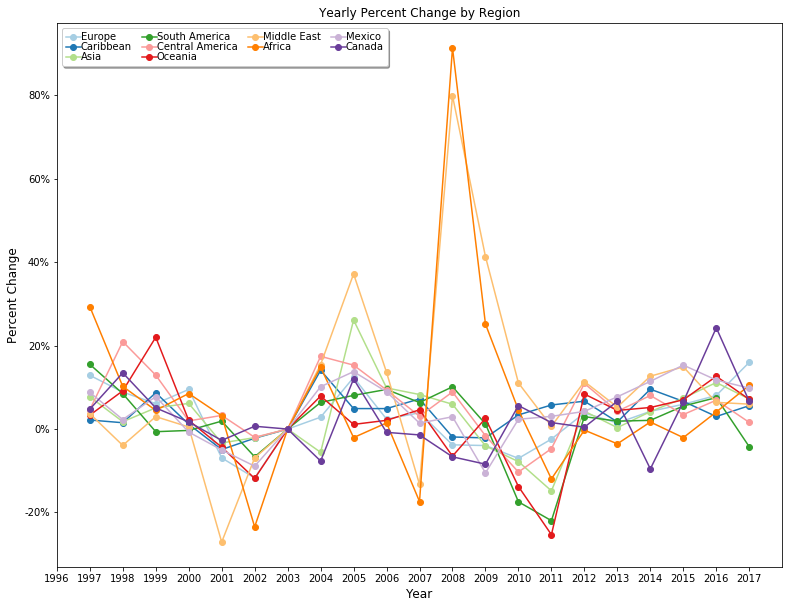

In [61]:
#begin figure
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

#plot using color index
columns = list(years_df.columns)[1:]
for i in np.arange(0, len(columns)):
    ax.plot(percent_changes['Year'], percent_changes[columns[i] + ' PC'], 'o-', 
            label = columns[i], color = color_pallette(i))
    
#set y-axis format
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#set legend
plt.legend(ncol=4, loc='upper left',
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

#set x-axis ticks
years = list(years_df['Year'])
plt.xticks(years)

#set titles and axis labels
plt.title('Yearly Percent Change by Region', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Percent Change', fontsize = 12)

#save figure
path = os.path.join('..', 'images', 'yearly_percent_change.png')
plt.savefig(path)

#show
plt.show()

We see that the most volatile changes occur in travel to the Middle East and Africa.  As those typically have the smallest amounts, small changes can be large percent changes.  Why there are huge increases to these two regions in 2008 and 2009 is unknown, though large relative decreases in 2001 and 2002 may be related to the September 11, 2001 terrorist attacks.

### Travel by Time of Year

We now wish to see what times of the year people travel.  We load the monthly totaled data to do so.

In [62]:
#load the months data frame
months_path = os.path.join('..', 'airline data', 'airline_data_monthly.csv')
months_df = pd.read_csv(months_path)
months_df.head()

Month    Europe  Caribbean     Asia  South America  Central America  \
0   January  14106866    8898811  8058539        3467020          3730921   
1  February  12707625    9450559  6634527        3346380          3691913   
2     March  19911075   11525989  8345117        3648778          4597174   
3     April  19396659   10669280  7668833        2959676          3498289   
4       May  26987981   10312719  8363550        3217258          3448322   

   Oceania  Middle East  Africa    Mexico   Canada  
0  1351424      1622638  432112   9700398  4128360  
1  1449233      1362145  376268   9846754  4436806  
2  1395497      1662361  494929  12022919  5180876  
3  1090113      1569197  429700  10247006  5310516  
4  1083107      1859426  526423  10061691  6855712

First, let us total this up and plot it.

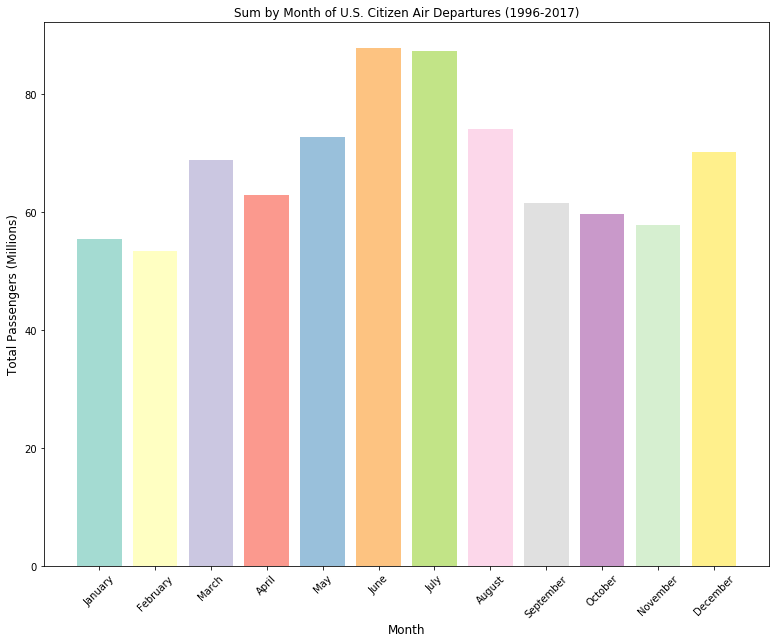

In [66]:
#set figure
f = plt.figure(figsize=(13, 10))

#create a data frame with transposed data and total up
df = months_df.set_index('Month').T
columns=list(df.columns)
df.loc['Total'] = df.sum()
total = df.iloc[-1]

#create a color palette
months_pallette = plt.get_cmap('Set3')
months_colors = [months_pallette(j) for j in range(0, 12)]

#plot
plt.bar(np.arange(len(columns)), total/1000000, align='center', alpha=0.8, color = months_colors)
plt.xticks(np.arange(len(columns)), columns, rotation = 45)

#axis labels
plt.title('Sum by Month of U.S. Citizen Air Departures (1996-2017)', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Total Passengers (Millions)', fontsize = 12)

#save figure
p = os.path.join('..', 'images', 'months_total.png')
plt.savefig(p)

plt.show()

We see that the most popular time to travel is the summer, with March and December (spring and winter breaks) being popular as well.  The winter months of January and February are the least popular.

Now, let's break this down by region.  As we will also have trouble with scale, we make two plots right off the back.

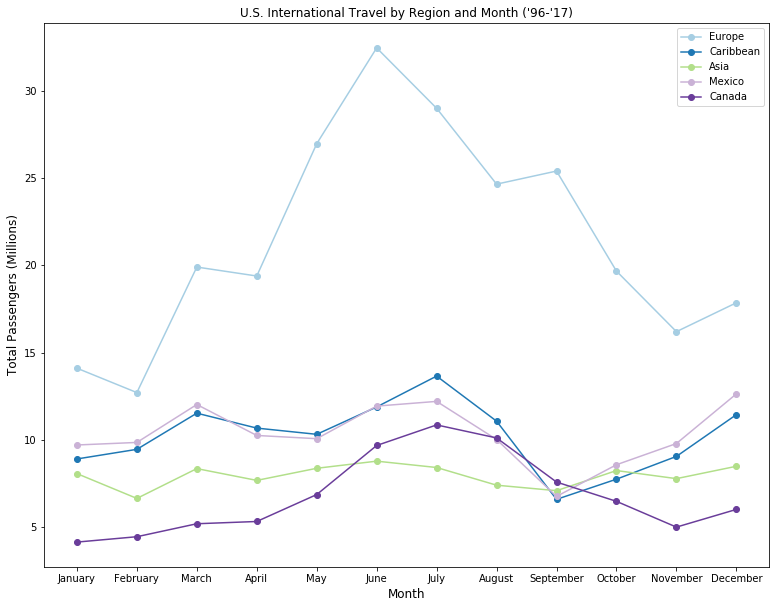

In [68]:
#plot a figure
fig = plt.figure(figsize = (13, 10))

#add a subfigure
ax = fig.add_subplot(111)

#get an x-axis and labels
x_axis = np.arange(0, len(months_df))
x_labels = months_df['Month'].tolist()

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#plot each column
color_idx = 0
for column in months_df.drop('Month', axis = 1):
    if column not in small_amounts:
        ax.plot(x_axis, months_df[column]/1000000, marker = 'o', color = color_pallette(color_idx), label = column)
    color_idx += 1

#add x-ticks
ax.set_xticks(x_axis)
ax.set_xticklabels(x_labels)

#add title and labels
ax.set_title("U.S. International Travel by Region and Month ('96-'17)", fontsize = 12)
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Total Passengers (Millions)', fontsize = 12)

#add a legend
ax.legend(loc = 'best')

#save figure
output_path = os.path.join('..', 'images', 'monthly_travel_by_region.png')
plt.savefig(output_path)

#show plot
plt.show()

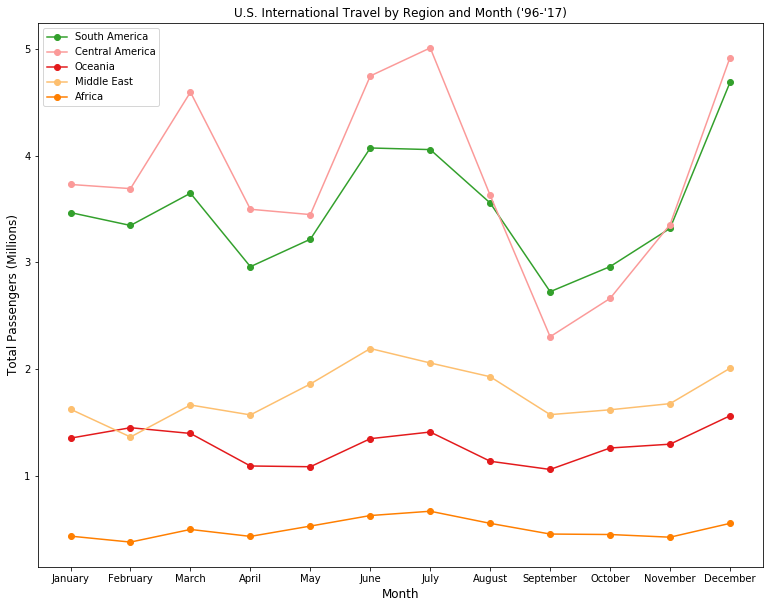

In [69]:
#do above for less traveled regions
small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#plot a figure
fig = plt.figure(figsize = (13, 10))

#add a subfigure
ax = fig.add_subplot(111)

#get an x-axis and labels
x_axis = np.arange(0, len(months_df))
x_labels = months_df['Month'].tolist()

#plot each column
color_idx = 0
for column in months_df.drop('Month', axis = 1):
    if column in small_amounts:
        ax.plot(x_axis, months_df[column]/1000000, marker = 'o', color = color_pallette(color_idx), label = column)
    color_idx += 1

#add x-ticks
ax.set_xticks(x_axis)
ax.set_xticklabels(x_labels)

#add title and labels
ax.set_title("U.S. International Travel by Region and Month ('96-'17)", fontsize = 12)
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Total Passengers (Millions)', fontsize = 12)

#add a legend
ax.legend(loc = 'best')

#save figure
output_path = os.path.join('..', 'images', 'monthly_travel_by_region_small.png')
plt.savefig(output_path)

#show plot
plt.show()

Mostly, we see the same trends as the total chart.  There are a few interesting trends.  For example, travel to Mexico, Central America, and the Caribbean really spikes in March, which could be related to Spring Break trips.  Also, travel to Asia is pretty flat all year, similarly to Africa, which actually seems to have the winter as the most popular time to visit (Southern Hemisphere summer perhaps).  We also see a sharp decline in September for some regions, such as Central America, South America, Mexico, and the Caribbean.  For some regions, this may be related to the peak hurricane season.

### Travel by Region

We mostly have done this in the first part, but we can total the data up for all years and plot that.

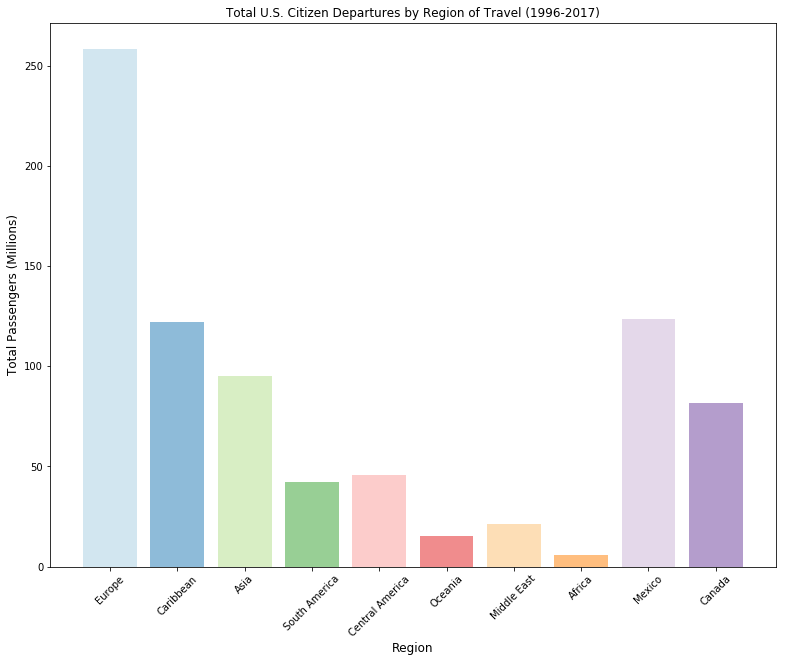

In [71]:
#begin figure
f = plt.figure(figsize=(13, 10))

#calculate totals
totals = years_df.iloc[:, 1:].sum()

#get columns for labels
columns = list(years_df.columns)[1:]

#get colors
colors = [color_pallette(i) for i in range(0, len(columns))]

#plot
plt.bar(np.arange(len(columns)), totals/1000000, alpha = 0.5, align = 'center', color = colors)
plt.xticks(np.arange(len(columns)), columns, rotation = 45)

#labels
plt.title('Total U.S. Citizen Departures by Region of Travel (1996-2017)', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Total Passengers (Millions)', fontsize = 12)

#save
p = os.path.join('..', 'images', 'region_totaled.png')
plt.savefig(p)

#show
plt.show()

As before, Europe is by far the most popular destination, with Africa the least popular.  Other high regions of travel are the Caribbean, Asia, Mexico, and Canada.

### Economic Impact
Now, we will look at some economic data and compare it to travel trends.

First, we will load the unemployment rate data.

In [73]:
#read in unemployment data
unemp_path = os.path.join('..', 'economic data', 'unemployment_avg_yearly.csv')

unemp_df = pd.read_csv(unemp_path)

unemp_df.head()

Year  Unemployment Rate
0  1996           5.408333
1  1997           4.941667
2  1998           4.500000
3  1999           4.216667
4  2000           3.966667

Now, let us load the median income data.

In [77]:
#read in income data
income_path = os.path.join('..', 'economic data', 'yearly_median_income.csv')

income_df = pd.read_csv(income_path)

income_df.head()

DATE  MEHOINUSA672N
0  1996-01-01          55394
1  1997-01-01          56533
2  1998-01-01          58612
3  1999-01-01          60062
4  2000-01-01          59938

We will rename the columns of the income data, and then plot these two together on the same axis.

In [78]:
#rename columns
income_df = income_df.rename(columns = {'DATE': 'Year', 'MEHOINUSA672N': 'Median Income'})

income_df['Year'] = unemp_df['Year']

income_df.head()

Year  Median Income
0  1996          55394
1  1997          56533
2  1998          58612
3  1999          60062
4  2000          59938

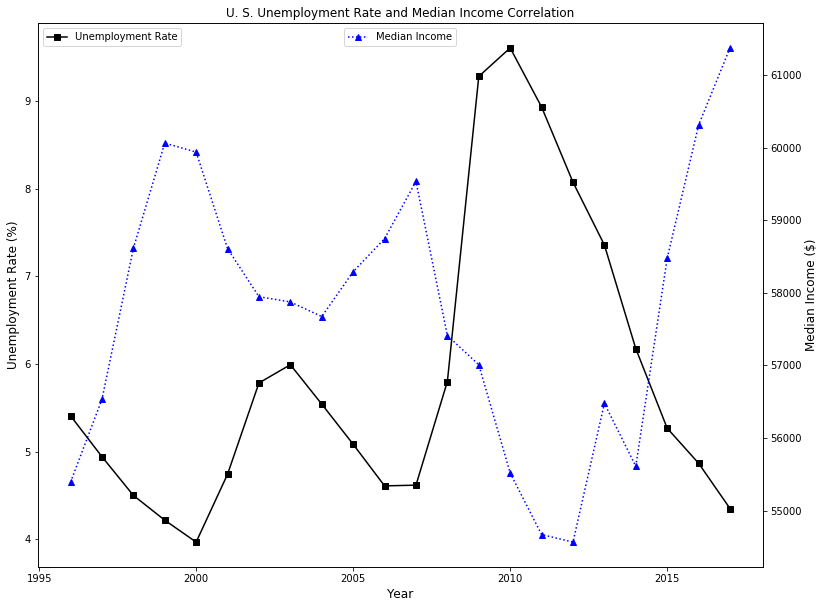

In [90]:
#plot these two on the same axis
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)
ax.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's-k', label = 'Unemployment Rate')
ax2 = ax.twinx()
ax2.plot(income_df['Year'], income_df['Median Income'], '^:b', label = 'Median Income')

#legends
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper center')

#labels
plt.title('U. S. Unemployment Rate and Median Income Correlation', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Unemployment Rate (%)', fontsize = 12)
ax2.set_ylabel('Median Income ($)', fontsize = 12)

#save
p = os.path.join('..', 'images', 'unemployment_income_corr.png')
plt.savefig(p)

#show
plt.show()

As we might expect, these two quantities are pretty much inversely correlated.  We will therefore use one indicator, unemployment rate, which we will overlay with plots as above.

First, with total travel.

In [83]:
#make a data frame of the totals
totals = years_df.iloc[:, 1:].sum(axis = 1).tolist()
total_df = pd.DataFrame({'Year': years_df['Year'], 'Total': totals})
total_df.head()

Year     Total
0  1996  26825900
1  1997  29157800
2  1998  31135100
3  1999  33202700
4  2000  34678345

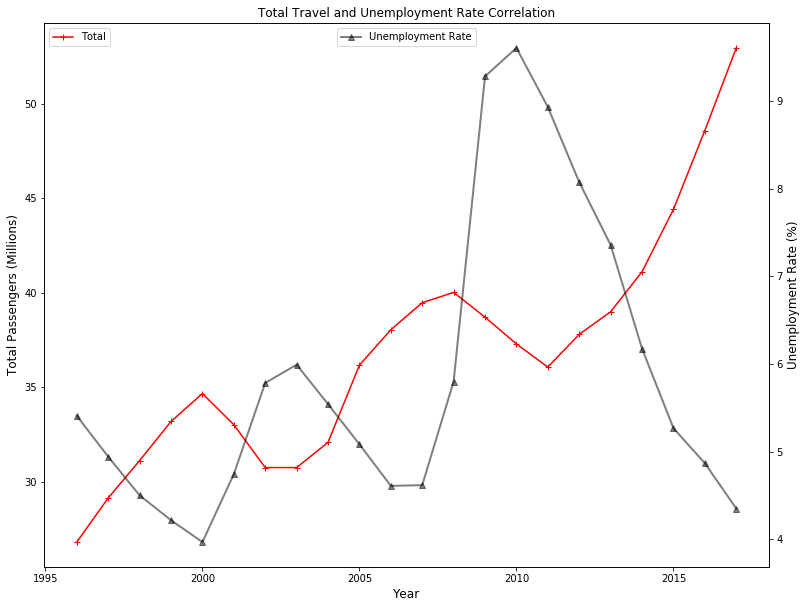

In [92]:
#plot
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)
ax.plot(total_df['Year'], total_df['Total']/1000000, '+-r')
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], '^-k', linewidth = 2, alpha = 0.5)

#legends and titles
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper center')
plt.title('Total Travel and Unemployment Rate Correlation', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Total Passengers (Millions)', fontsize = 12)
ax2.set_ylabel('Unemployment Rate (%)', fontsize = 12)

#save figure
path = os.path.join('..', 'images', 'unemployment_corr_totals.png')
plt.savefig(path)

#show plot
plt.show()

We see what we might naturally expect, that when the economy is worse (higher unemployment levels), travel decreases relative to the decades long increasing trend.

Next, we do this by region.

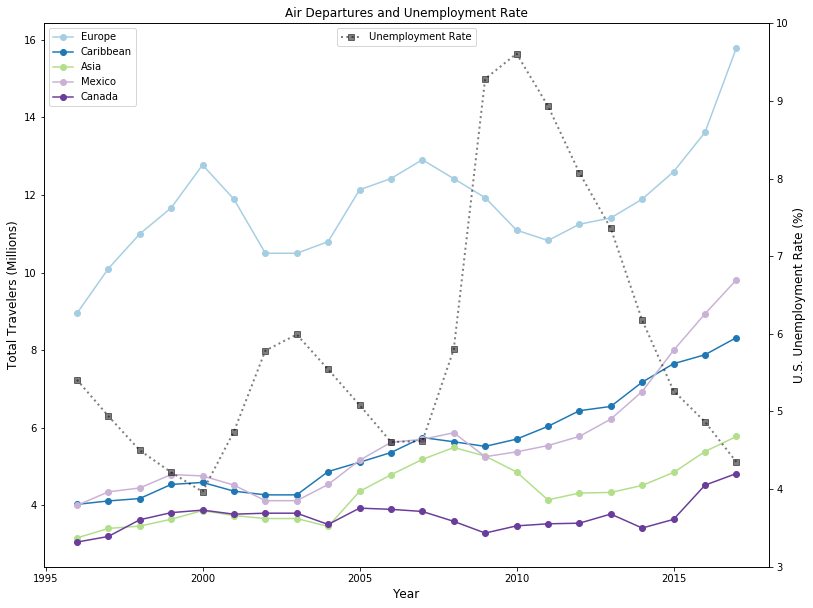

In [93]:
#plot yearly totals by region
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column not in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's:', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate', linewidth = 2)

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'best')
ax2.legend(loc = 'upper center')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Total Travelers (Millions)', fontsize = 12)
ax2.set_ylabel('U.S. Unemployment Rate (%)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', 'departures_and_unemployment.png')
plt.savefig(output_path)

#show figure
plt.show()

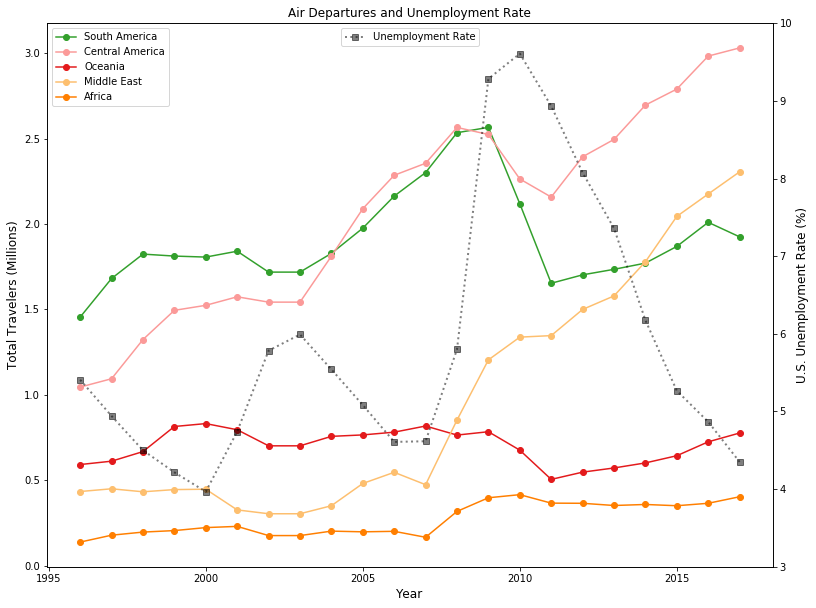

In [94]:
#do same for less traveled destinations
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's:', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate', linewidth = 2)

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'best')
ax2.legend(loc = 'upper center')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Total Travelers (Millions)', fontsize = 12)
ax2.set_ylabel('U.S. Unemployment Rate (%)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', 'departures_and_unemployment_small.png')
plt.savefig(output_path)

#show figure
plt.show()

We see pretty much what we saw for the total travel data.  However, some regions such as Europe show much more response to recessions around 2000 and 2009.  Other regions, like the Caribbean, Africa, and especially the Middle East simply grew as air travel destinations through the Great Recession.

### Travel Spending
We can graph the travel spending data we have to get a picture of how much money is being spent.

In [95]:
#load travel spending data
transpo_path = os.path.join('..', 'Transpo Data', 'Transpo_data_yearly.csv')

#read in data frame
transpo_df = pd.read_csv(transpo_path)

#look at data frame for columns
transpo_df.head()

Year  Total U.S. Travel and Tourism        Travel        Passenger fares
0  1996.0                        90231.0       69809.0                20422.0
1  1997.0                        94294.0       73426.0                20868.0
2  1998.0                        91423.0       71325.0                20098.0
3  1999.0                        94875.0       75450.0                19425.0
4  2000.0                       102560.0       82363.0                20197.0

In [96]:
#make year an integer
transpo_df['Year'] = transpo_df['Year'].astype('int64')

In [97]:
#print columns
cols = transpo_df.columns
print(cols)

Index(['Year', 'Total U.S. Travel and Tourism', '      Travel',
       '      Passenger fares'],
      dtype='object')


As seen, we have some annoying column headers.  We will simply select from the cols list.  We plot the last two columns, as those total to the other one.

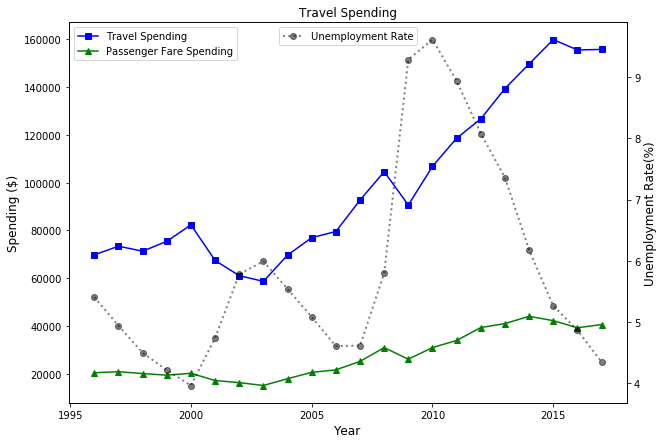

In [99]:
#plot both columns
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
ax.plot(transpo_df['Year'], transpo_df[cols[2]], 's-b', label = 'Travel Spending')
ax.plot(transpo_df['Year'], transpo_df[cols[3]], '^-g', label = 'Passenger Fare Spending')

#add unemployment data
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 'o:k', alpha = 0.5, 
         linewidth = 2, label = 'Unemployment Rate')

#legend
ax.legend(loc = 'best')
ax2.legend(loc = 'upper center')

#labels
plt.title('Travel Spending', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Spending ($)', fontsize = 12)
ax2.set_ylabel('Unemployment Rate(%)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', 'travel_spending.png')
plt.savefig(output_path)

#show figure
plt.show()

We find that in the economic downturn in the early 2000 spending on travel and fares both decreased.  Otherwise, while there was a decreas in 2009, the first big year of the Great Recession, otherwise spending simply increased through it.  One difference could be any effect of the 9/11 attacks on the industry.  Otherwise, we conclude that during the Great Recession, those who could travel ended up spending more.

### Events
We zoomed in around 2001 (9/11 attacks) and 2008 (Great Recession) in 5 year windows.  We plot by region, with two plots for less and more traveled regions.

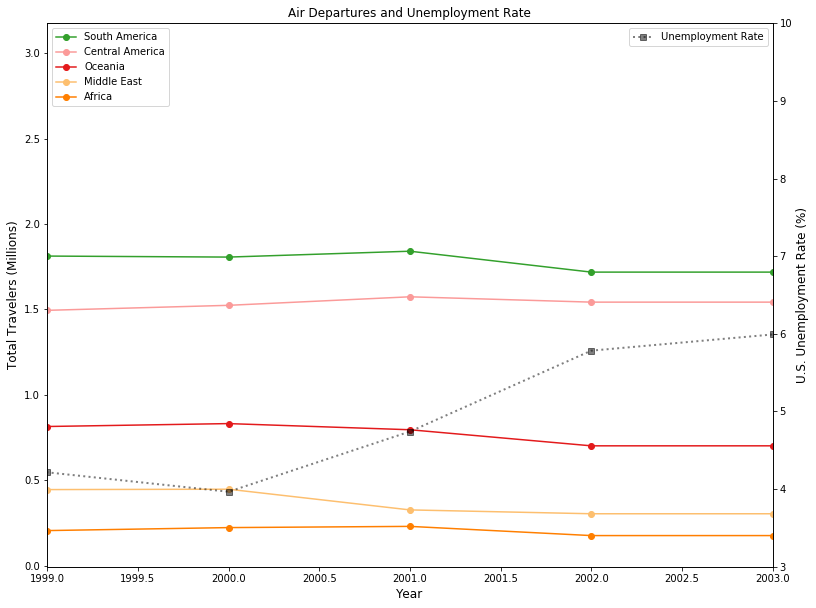

In [104]:
#less traveled regions from 99 to 03
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#set limit to 1999-2003
ax.set_xlim(1999, 2003)
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's:', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate', linewidth = 2)

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'upper left')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Total Travelers (Millions)', fontsize = 12)
ax2.set_ylabel('U.S. Unemployment Rate (%)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', '99_03_small.png')
plt.savefig(output_path)

#show figure
plt.show()

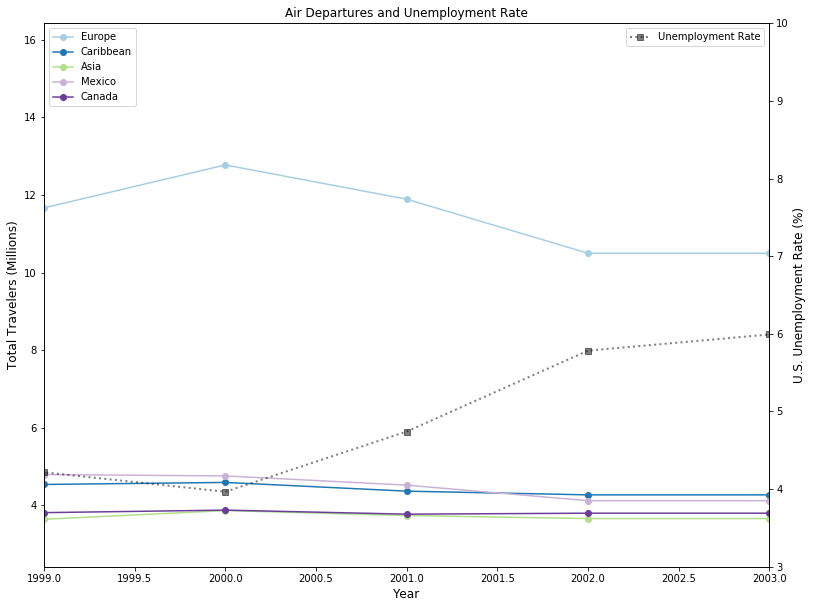

In [105]:
#do same for higher traveled destinations
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column not in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#set limit to 1999 to 2003
ax.set_xlim(1999, 2003)
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's:', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate', linewidth = 2)

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'upper left')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Total Travelers (Millions)', fontsize = 12)
ax2.set_ylabel('U.S. Unemployment Rate (%)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', '99_03_large.png')
plt.savefig(output_path)

#show figure
plt.show()

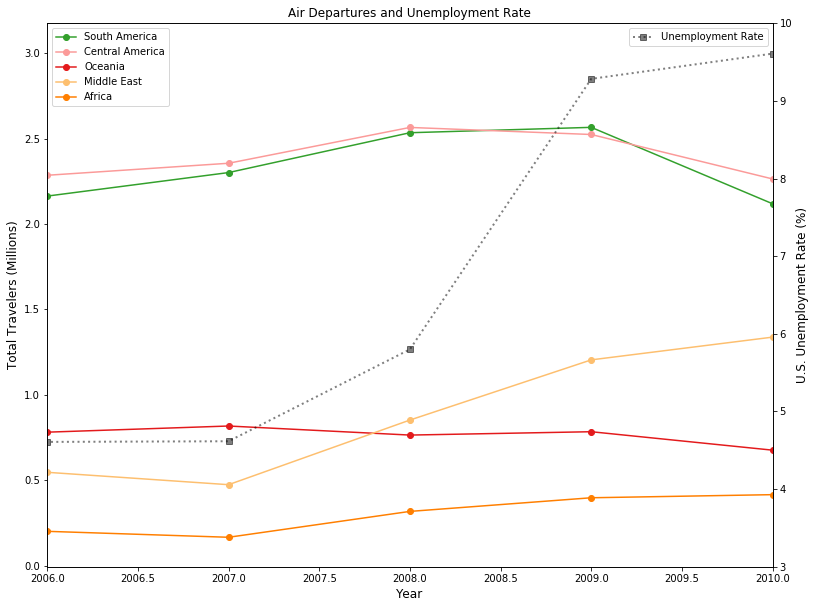

In [107]:
#06 to 10 less traveled
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#set limit to 2006 to 2010
ax.set_xlim(2006, 2010)
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's:', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate', linewidth = 2)

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'upper left')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Total Travelers (Millions)', fontsize = 12)
ax2.set_ylabel('U.S. Unemployment Rate (%)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', '06_10_small.png')
plt.savefig(output_path)

#show figure
plt.show()

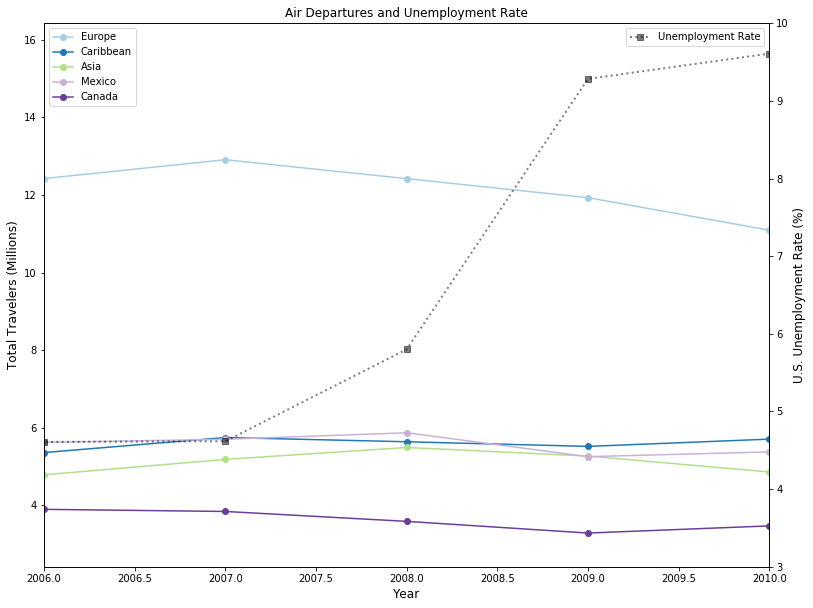

In [108]:
#06 to 10 more traveled
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column not in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#set limit to 2006 to 2010
ax.set_xlim(2006, 2010)
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's:', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate', linewidth = 2)

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'upper left')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Total Travelers (Millions)', fontsize = 12)
ax2.set_ylabel('U.S. Unemployment Rate (%)', fontsize = 12)

#save figure
output_path = os.path.join('..', 'images', '06_10_large.png')
plt.savefig(output_path)

#show figure
plt.show()

This seems rather inconclusive.  Of particular note is that an economic slowdown occurred around 2001, so that any impact of the 9/11 attacks alone is difficult to see.

### Aside: Domestic vs. International
We have data for the total and domestic U.S. flight numbers from 2003-2017, per the Bureau of Transporation Statistics.  We can thus calculate the international numbers and compare.

In [109]:
#read in flight totals for domestic and total
domestic_df = pd.read_csv(os.path.join('..', 'airline data', 'domestic_total_airline_travel.csv'))
domestic_df = domestic_df.dropna()
domestic_df

Year  Total  Domestic
0   2003.0  704.1     583.3
1   2004.0  767.2     629.8
2   2005.0  804.4     657.3
3   2006.0  811.7     658.4
4   2007.0  838.5     679.2
5   2008.0  812.7     651.7
6   2009.0  770.6     618.1
7   2010.0  790.2     629.5
8   2011.0  804.6     638.2
9   2012.0  815.5     642.3
10  2013.0  827.3     645.7
11  2014.0  853.3     662.8
12  2015.0  897.9     696.0
13  2016.0  933.1     720.0
14  2017.0  965.0     741.6

We need to calculate an international travel column.

In [110]:
#convert year to integer
domestic_df['Year'] = domestic_df['Year'].astype('int64')

#add international
domestic_df['International'] = domestic_df['Total'] - domestic_df['Domestic']

domestic_df.head()

Year  Total  Domestic  International
0  2003  704.1     583.3          120.8
1  2004  767.2     629.8          137.4
2  2005  804.4     657.3          147.1
3  2006  811.7     658.4          153.3
4  2007  838.5     679.2          159.3

Now, we plot.

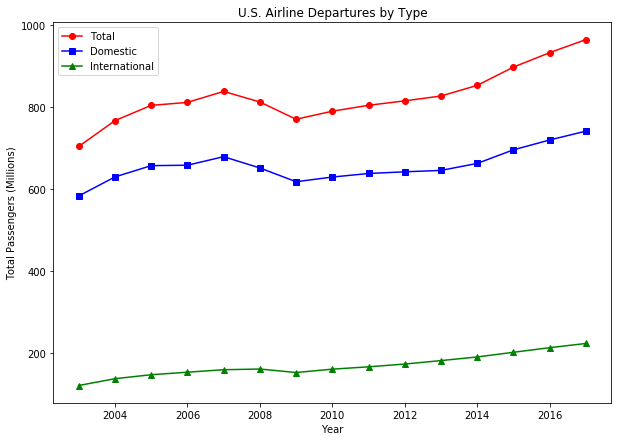

In [111]:
#graph data
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
ax.plot(domestic_df['Year'], domestic_df['Total'], 'o-r', label = 'Total')
ax.plot(domestic_df['Year'], domestic_df['Domestic'], 's-b', label = 'Domestic')
ax.plot(domestic_df['Year'], domestic_df['International'], '^-g', label = 'International')

#legend
plt.legend(loc = 'best')

#labels
plt.title('U.S. Airline Passengers by Type')
plt.xlabel('Year')
plt.ylabel('Total Passengers (Millions)')

#save figure
output_path = os.path.join('..', 'images', 'travel_destination.png')
plt.savefig(output_path)

#show figure
plt.show()

One note here is that our data numbers are actually quite off.  For 2017, our primary data source totals to over 50 million international departures by U.S. citizens.  Now, this could to some extent be an issue of double counting.  As well, this graph may contain non-U.S. citizens.  In any case, drawing direct correlations is difficult, but we do see a general increase here over time as we saw in our primary data source.  We do not have data to around 2001 here, so that we do not see effects of the early 2000s economic downturn.  However, for the Great Recession, we actually see much more effect on domestic numbers here than international numbers around 2009.  This could be due to a difference in domestic vs. international passengers.  For example, international travel is probably on the whole more expensive, so perhaps the recession did not affect those who could afford to travel internationally as much.